In [22]:
# https://data.gov.ie/dataset/dublin-city-council-administrative-area-maps
# https://gis.stackexchange.com/questions/113799/how-to-read-a-shapefile-in-python
# https://ncar.github.io/PySpark4Climate/tutorials/pyspark-geo-analysis/shapefile-primer/
# https://data.gov.ie/dataset/dublin-city-roads-and-streets/resource/294c5bf2-c89c-4c59-955d-d66f10ca428b
# https://data.smartdublin.ie/dataset/development-plans-dublin-city

In [26]:
# !pip install Shapely

# !pip install pyshp
# !pip install geopandas
# !pip install matplotlib
# !pip install descartes

In [27]:
# import csv
# import shapefile
import numpy as np
import pandas as pd

import shapefile # pyshp
import descartes
import geopandas as gpd

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
from matplotlib.cm import *
%matplotlib inline
matplotlib.style.use('ggplot')

from IPython.display import Image as ImageShow

In [4]:
# %cd ../../data/airbnbdata/geo/shapefiles/dcc-admin-areas
# %cd ../../data/airbnbdata/geo/shapefiles/electoral-divisions-gps-projection
# %cd ../../data/airbnbdata/geo/shapefiles/small-areas-gps-projection
%cd ../../data/airbnbdata/geo/shapefiles/dcc-development-planning
!ls

/usr/local/bin/notebooks/data/airbnbdata/geo/shapefiles/dcc-development-planning
dbodevplan2010transport2010p20111014-1259.dbf
dbodevplan2010transport2010p20111014-1259.prj
dbodevplan2010transport2010p20111014-1259.shp
dbodevplan2010transport2010p20111014-1259.shx


In [14]:
# sf = shapefile.Reader("100.shp")
# sf = shapefile.Reader("electoral_divisions_gps.shp")
# sf = shapefile.Reader("small_areas_gps.shp")
sf = shapefile.Reader("dccdevelopmentplanp20141002-1159.shp")
print('number of shapes imported: ', len(sf.shapes()))

number of shapes imported:  6561


In [15]:
shapes  = sf.shapes()
# shapes

In [16]:
for name in dir(shapes[5]):
    if not name.startswith('__'):
        print(name)

_from_geojson
bbox
parts
points
shapeType
shapeTypeName


In [17]:
shapes[5].shapeType

5

In [18]:
# Get the bounding box of the 5th shape.
# Round coordinates to 3 decimal places
bbox = shapes[5].bbox
print(['%.3f' % coord for coord in bbox])

['312942.173', '236074.602', '312964.378', '236104.936']


In [19]:
# Get all the information for a single shape(in this case, the 5th shape)
shape_ex = sf.shape(5)

In [20]:
x_lon = np.zeros((len(shape_ex.points), 1))
y_lat = np.zeros((len(shape_ex.points), 1))
for ip in range(len(shape_ex.points)):
    x_lon[ip] = shape_ex.points[ip][0]
    y_lat[ip] = shape_ex.points[ip][1]

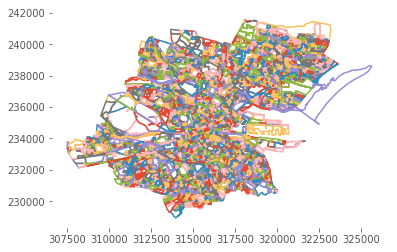

In [21]:
def plot(sf):

    #   -- plot --
    fig     = plt.figure()
    ax      = fig.add_subplot(111)
    ax.get_yaxis().set_visible(True)
    ax.get_xaxis().set_visible(True)
    ax.set_frame_on(False)

    for shape in sf.shapeRecords():
        x = [i[0] for i in shape.shape.points[:]]
        y = [i[1] for i in shape.shape.points[:]]
        plt.plot(x,y)

    plt.show()
plot(sf)